In [3]:
import glob
import pickle
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
%matplotlib inline

kaggle_prediction

---------------------------------
/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_prediction/pred_result_detail_Dog_5.p
0.492275280899
0.694288389513
0.597612359551
0.564606741573
0.509831460674
0.253043071161
0.904728464419
0.602294007491
0.479634831461
0.45856741573

---------------------------------
/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_prediction/pred_result_detail_Patient_1.p
0.70695970696
0.473901098901
0.577838827839
0.482371794872
0.524725274725
0.687042124542
0.498168498168
0.667124542125
0.631868131868
0.685897435897

---------------------------------
/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_prediction/pred_result_detail_Patient_2.p
0.292328042328
0.267195767196
0.436772486772
0.378042328042
0.442857142857
0.306878306878
0.443386243386
0.294708994709
0.291534391534
0.317195767196

Mean and std across subjects, for each feature combination
[[ 0

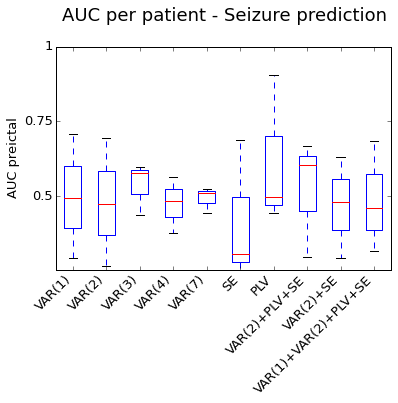

In [4]:
#path = '/nfs/nhome/live/jmagraner/gatsby-hackathon-seizure/results/'
path = '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/'
folders = ['kaggle_prediction']

features = [
        'ARFeatures()',
        'VarLagsARFeatures(2)',
        'VarLagsARFeatures(3)',
        'VarLagsARFeatures(4)',
        'VarLagsARFeatures(7)',
        'SEFeatures()',
        'PLVFeatures()',
        'StackFeatures(VarLagsARFeatures(2), PLVFeatures(), SEFeatures())',
        'StackFeatures(VarLagsARFeatures(2), SEFeatures())',
        'StackFeatures(ARFeatures(), VarLagsARFeatures(2), SEFeatures())',
        'StackFeatures(ARFeatures(), VarLagsARFeatures(2), PLVFeatures(), SEFeatures())',
        'StackFeatures(VarLagsARFeatures(2), VarLagsARFeatures(4), PLVFeatures(), SEFeatures())'
    ]

features_names = [
        'VAR(1)',
        'VAR(2)',
        'VAR(3)',
        'VAR(4)',
        'VAR(7)',
        'SE',
        'PLV',
        'VAR(2)+PLV+SE',
        'VAR(2)+SE',
        'VAR(1)+VAR(2)+SE',
        'VAR(1)+VAR(2)+PLV+SE',
        'VAR(2)+VAR(4)+PLV+SE' ]


for folder in folders:
    print folder

    files = glob.glob(path+folder+'/'+'*.p')

    range_feat = range(0,9)+[10]
    n_subjects = len(files)
    n_comb = len(range_feat)
    n_col = 1

    Res = np.zeros((n_subjects,n_comb,n_col))


    for i_f,f in enumerate(files):
        print ''
        print '---------------------------------'
        print f
        result_list = pickle.load(open(f,'rb'))
        for i_feat,feat in enumerate([result_list[i] for i in range_feat]):
            Res[i_f,i_feat,0] = feat['seizure_auc']
            print Res[i_f,i_feat,0]

    print ''
    print 'Mean and std across subjects, for each feature combination' 
    
    R_Av = np.mean(Res,axis=0) 
    R_std = np.std(Res,axis=0) 
    print np.concatenate((R_Av,R_std),axis=1)

    #-----------------

    fig,ax = plt.subplots()
    ax.boxplot(Res[:,:,0])
    pmin = np.min(np.min(Res[:,:,0]))
    ax.set_title('AUC per patient - Seizure prediction\n',fontsize=18, ha='center')
    ax.set_ylabel('AUC preictal')
    ax.set_ylim([pmin,1])
    ax.set_yticks([0.5,0.75,1.])
    ax.set_yticklabels(['0.5','0.75','1'])
    ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    plt.show()
    #fig.savefig(folder+'_seizure'+'.svg',bbox_inches='tight')
    #fig.savefig(folder+'_seizure'+'.pdf',bbox_inches='tight')

    #-----------------
